In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('books.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    399 non-null    int64  
 1   goodreads_book_id          399 non-null    int64  
 2   best_book_id               399 non-null    int64  
 3   work_id                    399 non-null    int64  
 4   books_count                399 non-null    int64  
 5   isbn                       388 non-null    object 
 6   isbn13                     389 non-null    float64
 7   authors                    399 non-null    object 
 8   original_publication_year  399 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      399 non-null    object 
 11  language_code              356 non-null    object 
 12  average_rating             399 non-null    float64
 13  ratings_count              399 non-null    int64  

In [4]:
df.isna().sum()

book_id                       0
goodreads_book_id             0
best_book_id                  0
work_id                       0
books_count                   0
isbn                         11
isbn13                       10
authors                       0
original_publication_year     0
original_title               36
title                         0
language_code                43
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
image_url                     0
small_image_url               0
NonEnglish                    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 399
Number of columns: 24


In [7]:
books_without_original_title = df[df['original_title'].isnull()].shape[0]
print(f"Number of books without an original title: {books_without_original_title}")

Number of books without an original title: 36


In [8]:
unique_books_count = df.dropna(subset=['original_title']).nunique()['book_id']
print(f"Number of unique books: {unique_books_count}")

Number of unique books: 363


In [9]:
average_rating = df['average_rating'].mean()
print(f"Average rating of all books: {average_rating}")

Average rating of all books: 3.9837844611528843


In [10]:
books_published_in_2000 = df[df['original_publication_year'] == 2000].shape[0]
print(f"Number of books published in 2000: {books_published_in_2000}")

Number of books published in 2000: 8


In [11]:
max_ratings_book = df.loc[df['work_ratings_count'].idxmax()]['title']
print(f"Book with maximum ratings: {max_ratings_book}")

Book with maximum ratings: The Diary of a Young Girl


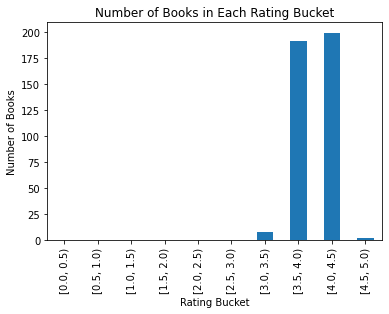

In [12]:
rating_buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rating_bucket'] = pd.cut(df['average_rating'], bins=rating_buckets, right=False)
rating_counts = df['rating_bucket'].value_counts().sort_index()

# Plotting
rating_counts.plot(kind='bar', xlabel='Rating Bucket', ylabel='Number of Books', title='Number of Books in Each Rating Bucket')
plt.show()